In [3]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.feature import match_template
from skimage.feature import peak_local_max
from skimage import io

mix = io.imread('~/image/4.png')
#mix = io.imread('~/image/mix_2.png')
tmp = io.imread('~/image/4_tmp.png')

win = 30
r = mix.shape[0]
c = mix.shape[1]

In [19]:
def pattern_match(mold:np.array, template:np.array, threshold:float=0.6):
    res = match_template(mold, template)
    peaks = peak_local_max(res,min_distance=0,threshold_rel=threshold)
    return peaks[:,1]+win/2, r-(peaks[:,0]+win/2)
    
xpt, ypt = pattern_match(mix, tmp)
ypt += r-402
print(r,c)

441 600


In [20]:
ypt

array([ 96.,  96.,  97., 104., 104., 105., 110., 110., 110., 110., 111.,
       111., 111., 122., 122., 123., 123., 129., 130., 141., 142., 142.,
       148., 149., 149., 149., 150., 177., 178., 178., 179., 179., 180.,
       180., 195., 195., 196., 198., 198., 199., 199., 253., 253., 253.,
       253., 254., 254., 254., 256., 256., 257., 285., 286., 286., 286.,
       287., 289., 289., 290., 290., 334., 335., 335., 336., 339., 340.,
       348., 349., 349., 368., 368., 369., 369., 369., 369., 370., 397.,
       397., 398., 398., 433., 434., 434., 447., 447., 448.])

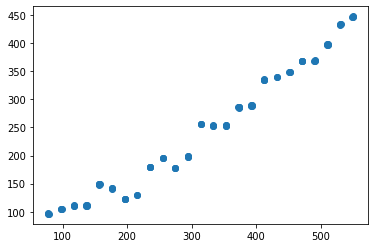

In [21]:
plt.scatter(xpt, ypt)

441 600


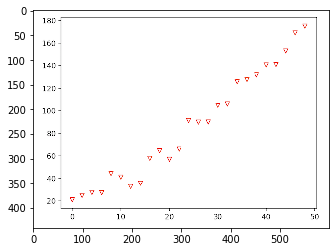

In [15]:
print(r, c)
plt.imshow(mix)
plt.show()

(781, 1049, 1)


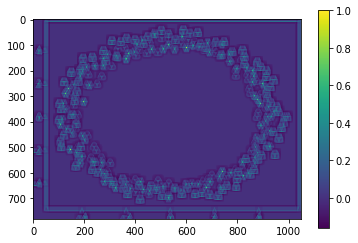

In [25]:
res = match_template(mix, tmp)
print(res.shape)
plt.imshow(res.reshape(res.shape[0], res.shape[1]))
plt.colorbar()
plt.show()

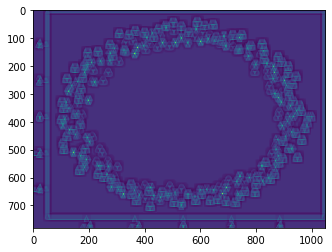

In [26]:
from scipy.ndimage.filters import gaussian_filter
# Smooth the correlations
sg = 0.3
res = res.reshape(res.shape[0], res.shape[1])
res_smooth = gaussian_filter(res, sg)
plt.imshow(res_smooth)


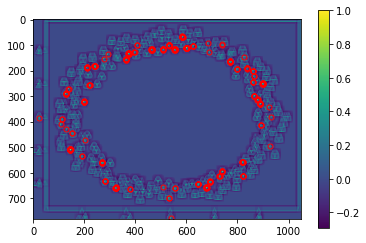

In [22]:
peaks = peak_local_max(res,min_distance=0,threshold_rel=0.5)

plt.imshow(res.reshape(res.shape[0], res.shape[1]))
plt.colorbar()
# highlight matched regions (plural)
plt.plot(peaks[:,1], peaks[:,0], '.', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.show()

In [32]:
print(peaks)

[[706 532   0]
 [705 533   0]
 [705 532   0]
 ...
 [ 33 545   0]
 [ 32 547   0]
 [ 32 546   0]]


In [33]:
res[706,532]

array([0.65938273])

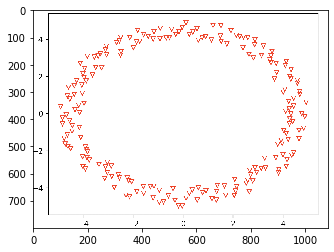

In [5]:
plt.imshow(mix)
plt.plot(peaks[:,1]+win/2, peaks[:,0]+win/2, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.show()